In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time as time

In [36]:
np.random.seed(1234)

#Logistic Regression

### Model

![image.png](https://drive.google.com/uc?id=1pnidxNrAEx2_belcDMizRj-IBozZMAIM)

In [37]:
# calculate linear combination of features
def linear_combination(X:np.ndarray, w:np.ndarray) ->np.ndarray:
    '''Calculate linear combination
    
    this is given by :
    z = Xw
    shape(X) = (n, m)
    shape(w) = (m, 1)
    shape(z) = (n, 1)
    returns numpy array
    '''
    return X@w
    

### Sigmoid

![image.png](https://drive.google.com/uc?id=1LpnG5Llo-bu4AiTE4CMJ4G0aWmU_VXZk)

In [38]:
# Apply sigmoid function
def sigmoid(z:np.ndarray) ->np.ndarray:
    return 1/(1+np.exp(-z))

Now we predict the examples and based on value of sigmoid we group them as <strong>label 1</strong> if $P(z) > threshold$ or <strong>label 0</strong> if $P(z) < threshold$ 

In [39]:
def predict(X:np.ndarray, w:np.ndarray, threshold:float) ->np.ndarray:
    return np.where(sigmoid(linear_combination(X, w)) > threshold, 1, 0)

In [40]:
# test the function
# always add 1 as bias to feature vector
feature_matrix = np.array([[1, 20, 2], [1, 2, 2]])
weight_vector = np.array([-1, 0, 1])

print(f'Shape of feature matrix:{feature_matrix.shape}')
print(f'Shape of weight vector:{weight_vector.shape}')

class_labels = predict(feature_matrix, weight_vector, 0.5)

print(f'Shape of output:{class_labels.shape}')
print(f'Label vectors are :{class_labels}')

Shape of feature matrix:(2, 3)
Shape of weight vector:(3,)
Shape of output:(2,)
Label vectors are :[1 1]


### Loss Function

![image.png](https://drive.google.com/uc?id=1z8IsBO-0lSdAurkeI0ieN0ALAvKFIIKG)

![image.png](https://drive.google.com/uc?id=1QFEehL2UPhByCFGZoIQomrWBD3nJ5m21)

![image.png](https://drive.google.com/uc?id=1OjBMkkg_-2UAYQ7N_IryyPEgPh1yEqhY)

In [41]:
def loss(y, sigmoid_vector, weight_vector, l1_reg_rate, l2_reg_rate):
    return (-1*(np.sum(y*np.log(sigmoid_vector) + (1-y)*np.log(1-sigmoid_vector)))
    + l1_reg_rate*np.dot(np.transpose(weight_vector), weight_vector)
    +l2_reg_rate*np.sum(np.abs(weight_vector)))

If we don't want regularization then we set $l1\_reg\_rate$ and $l2\_reg\_rate$ to $0$.

### Differentiation of Loss and Sigmoid

![image.png](https://drive.google.com/uc?id=1WM6hUNU8hS-IWposcn-EKGKSolGL0dcO)

![image.png](https://drive.google.com/uc?id=1SvCEou91tSEkoN283I7sLUXvwvbIb85M)

![image.png](https://drive.google.com/uc?id=1oQsGXmcYHcGJ8t_O_nD1quXNCgTvEhzV)

In [42]:
def calculate_gradient(X:np.ndarray, y:np.ndarray, w:np.ndarray,
                       reg_rate:float)->np.ndarray:
    '''Calculated gradient w.r.to loss function
        returna a vector containing gradient w.r.to
        each weight vector
    '''
    return np.transpose(X)@(sigmoid(linear_combination(X, w))-y) + reg_rate*w

### Combine all member functions in a single class named Logistic Regression

In [43]:
class Logistic_regression(object):
    '''Logistic reression model
    y = sigmoid(X@w)
    '''
    def set_weights(self, w):
        self.w = w

    def linear_combination(self, X:np.ndarray)->np.ndarray:
        '''
        Calculate linear combination
        this is given by :
        z = Xw
        shape(X) = (n, m)
        shape(w) = (m, 1)
        shape(z) = (n, 1)
        returns numpy array
        '''
        return X@self.w

    def sigmoid(self, z:np.ndarray) ->np.ndarray:
        '''
        Sigmoid implementation
        Returns probability of each member belinging
        to particular class
        '''
        return 1/(1+np.exp(-z))

    def activation(self, X:np.ndarray)->np.ndarray:
        return self.sigmoid(self.linear_combination(X))
    
    def predict(self, x:np.ndarray, threshold:float=0.5):
        '''
        Predict the output lables based on input X
        and weight vector w
        '''
        return (self.activation(x) > threshold).astype(int)
    
    def loss(self, X:np.ndarray, y:np.ndarray, reg_rate:float)->float:
        '''
        Calculate Binary cross entropy loss
        '''
        predicted_prob = self.activation(X)
        return (-1*(np.sum(y*np.log(predicted_prob) + 
                    (1-y)*np.log(1-predicted_prob)))+
                    reg_rate*np.dot(np.transpose(self.w), self.w))
        
    def calculate_gradient(self, X:np.ndarray, y:np.ndarray,
                           reg_rate:float)->np.ndarray:
        '''
        Calculate gradient of loss w.r.ro each weight vector
        '''
        return np.transpose(X)@(self.activation(X)-y) + reg_rate*self.w
    
    def update_weights(self, grad:np.ndarray, lr:float)->np.ndarray:
        '''
        Updates weights based on the formula
        w_new = w_old - lr*(grad_of_loss)
        '''
        return (self.w-lr*grad)
    
    def gd(self, X:np.ndarray, y:np.ndarray,
           num_epoches:int, lr:float, reg_rate:float)->np.ndarray:
        '''
        Estimated parameters bof logistic regression model 
        with gradient descent.
        '''
        self.w = np.zeros(X.shape[1])
        self.w_all = []
        self.err_all = []
        for i in range(num_epoches):
            dJdW = self.calculate_gradient(X, y, reg_rate)
            self.w_all.append(self.w)
            self.err_all.append(self.loss(X, y, reg_rate)) # stored loss at each step
            self.w = self.update_weights(dJdW, lr)
        return self.w

### Running logistic regression on toy data set

In [44]:
def create_toy_data():
    x0 = np.random.normal(size=50).reshape(-1, 2) -1
    x1 = np.random.normal(size=50).reshape(-1, 2) +1
    return np.concatenate([x0, x1]), np.concatenate([np.zeros(25), np.ones(25)]).astype(int)

In [45]:
feature_matrix, label_vector = create_toy_data()
feature_matrix[:5]

array([[-0.52856484, -2.19097569],
       [ 0.43270697, -1.3126519 ],
       [-1.72058873, -0.11283706],
       [-0.14041159, -1.6365235 ],
       [-0.98430363, -3.24268495]])

In [46]:
label_vector

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1])

In [47]:
print(f'Shape of feature matrix:{feature_matrix.shape}')
print(f'Shape of lable vector:{label_vector.shape}')

Shape of feature matrix:(50, 2)
Shape of lable vector:(50,)


Add polynomial features<br>
We add a bias of $1$ with help of polynomial features.

In [48]:
import itertools
import functools
def combinations(x, degree):
    return itertools.combinations_with_replacement(x, degree)

def compute_new_features(items):
    return functools.reduce(lambda x, y: x * y, items)

def polynomial_transform(x, degree):
    if x.ndim == 1:
        x = x[:, None]

    features = [np.ones(len(x))] #a list of np-arrays with all 1.

    for degree in range(1, degree + 1):
        for item in combinations(x.T, degree):
            features.append(compute_new_features(item))
            
    return np.asarray(features).T

In [49]:
# new feature matrix after adding bias
feature_matrix_bias = polynomial_transform(feature_matrix, degree=1)
feature_matrix_bias.shape

(50, 3)

In [50]:
feature_matrix_bias[:3]

array([[ 1.        , -0.52856484, -2.19097569],
       [ 1.        ,  0.43270697, -1.3126519 ],
       [ 1.        , -1.72058873, -0.11283706]])

In [51]:
# perform training and test split on dataset
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(feature_matrix_bias,
                                                label_vector)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(37, 3) (13, 3) (37,) (13,)


In [52]:
y_train

array([1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1])

Visualize the data points

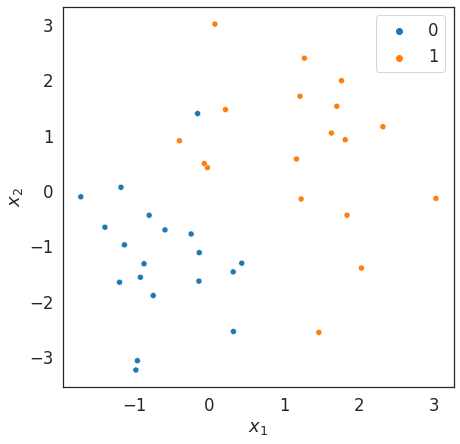

In [53]:
sns.set_style('white')
f = plt.figure(figsize=(7,7))
sns.set_context('notebook', font_scale=1.5, rc={'lines.linewidth':2.5})

sns.scatterplot(data=x_train, x=x_train[:,1], y=x_train[:,2],
                hue=y_train)
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.show()

Initiate object of ```LogisticRegression``` class and train the model<br>by calling ```gd``` method of the class.<br>
Here $\lambda = 0$ i.e. no regularization

In [54]:
log_reg = Logistic_regression()
log_reg.gd(x_train, y_train, num_epoches=1000,
           reg_rate=0, lr=1e-2)

array([-0.14559758,  4.43289743,  1.94514132])

Plot learning curve<br>
Pass the $err\_all$ member variable of logistric regression class that stores the error by the model in each step.

In [55]:
def plot_learning_curve(err):
    plt.plot(np.arange(len(err)), err, 'r-')
    plt.xlabel('Epoches')
    plt.ylabel('$J(w)$')

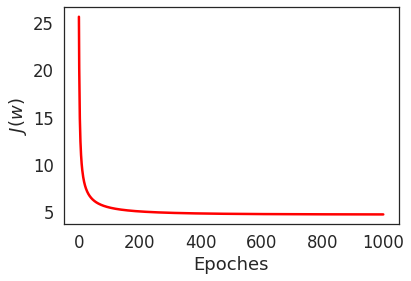

In [56]:
plot_learning_curve(log_reg.err_all)

The weight vectors learnt by a model

In [57]:
print(f'Weights learnt by model:{log_reg.w}')

Weights learnt by model:[-0.14559758  4.43289743  1.94514132]


Visualize the model

In [69]:
sns.set_context(context='notebook',font_scale=1.5,rc={"lines.linewidth":2.5})

def visualize_model(X_train, labels, log_reg, degree=1):
    f = plt.figure(figsize=(8,8))

    x1_min = np.min(x_train[:,1])
    x1_max = np.max(x_train[:,1])
    x2_min = np.min(x_train[:,2])
    x2_max = np.max(x_train[:,2])
    
    x1_test, x2_test = np.meshgrid(np.linspace(x1_min, x1_max, 100), np.linspace(x2_min, x2_max, 100)) 
    x_test = np.array([x1_test, x2_test]).reshape(2,-1).T
    x_test_poly = polynomial_transform(x_test, degree=degree)
    y_test = log_reg.predict(x_test_poly, 0.5)
    
    sns.scatterplot(data=x_train, x=x_train[:,1], y=x_train[:,2], hue=labels)
    plt.contourf(x1_test, x2_test, y_test.reshape(100,100), alpha=0.5, levels=np.linspace(0,1,3))
    plt.gca().set_aspect('equal', adjustable='box')

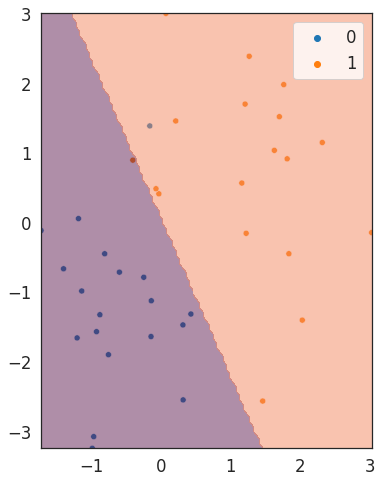

In [71]:
visualize_model(x_train, y_train, log_reg)